In [534]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
np.random.seed(42)

In [535]:
digits=load_digits()
#we have 1797 data samples of digits
#we need to flatten the image, meaning reshaping the matrix of the image bits into a vector bits
imgs_len=len(digits.images)
vector_images=digits.images.reshape(imgs_len,-1) #the -1 stands for: unknown dimension and we want numpy to figure out the best vector to fit according to the length given.

In [536]:

#print(vector_images.shape)
#print(digits.images.shape)-->for comparing porpuses
train_x,test_x,train_y,test_y=train_test_split(vector_images,digits.target,test_size=0.3,random_state=42)
clf_svc=SVC(kernel='rbf',C=2)
clf_svc.fit(train_x,train_y)
ypred=clf_svc.predict(test_x)
#To compare visually with the prediction, we need to return the reshaped matrix to its original dimension, so we will reshape test_x output back as the original images,
#otherwise, we wont be able to plot the image.
reshaped_testx=test_x.reshape(len(test_x),8,8)
# plt.imshow(reshaped_testx[0])
# print(reshaped_testx[0])
# print(digits.images.shape)
# print(reshaped_testx.shape)

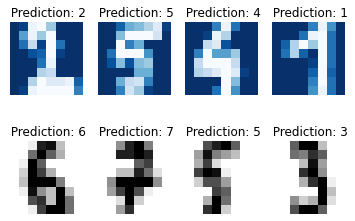

In [537]:
import random
_, axes = plt.subplots(2, 4)
images_and_predictions=list(zip(reshaped_testx,ypred))
random.shuffle(images_and_predictions) #shuffeling the list so each time we run the check we get different sets of predictions.
for ax, (image, prediction) in zip(axes[0,:], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.Blues_r, interpolation='nearest')
    ax.set_title(' Prediction: %i' % prediction)
for ax, (image, prediction) in zip(axes[1,:], images_and_predictions[4:8]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(' Prediction: %i' % prediction)

->              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       1.00      0.96      0.98        54
           4       1.00      1.00      1.00        60
           5       0.99      1.00      0.99        66
           6       1.00      1.00      1.00        53
           7       0.98      0.98      0.98        55
           8       0.96      1.00      0.98        43
           9       0.98      0.97      0.97        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



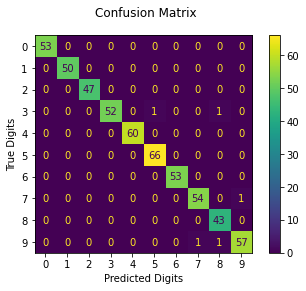

In [552]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print("->"+classification_report(test_y,ypred))
con_matrix=metrics.plot_confusion_matrix(clf_svc,test_x,test_y)
con_matrix.figure_.suptitle("Confusion Matrix")
plt.xlabel('Predicted Digits')
plt.ylabel('True Digits')
plt.show()

[[ 0.   0.   0.2  0.   5.5  1.7  0.   0.1  0.   0.2  0.   2.1 22.7  3.
   0.   0.2  0.1  0.   0.7 14.3 16.   3.3  0.   0.2  0.2  0.6 14.   7.5
  10.   4.7  0.   0.2  0.   0.5  3.4  0.  13.2  3.1  0.   0.1  0.   0.
   0.   0.2 13.4  1.5  0.   0.   0.   0.   0.1  0.  13.2  0.9  0.   0.
   0.   0.   0.   0.   2.4  0.2  0.   0. ]]
[ 0.  0.  5. 13. 13.  8.  0.  0.  0.  0. 16. 11. 13. 16.  6.  0.  0.  1.
 16.  5.  2. 14.  9.  0.  0.  0.  9. 16. 16. 15.  0.  0.  0.  0. 10. 16.
 14. 14.  0.  0.  0.  5. 15.  4.  0. 16.  6.  0.  0.  6. 14.  7.  6. 16.
  4.  0.  0.  0.  7. 15. 16. 10.  0.  0.]


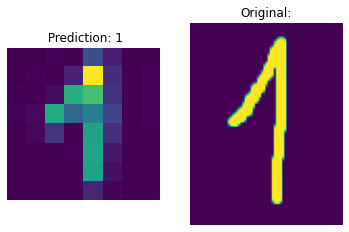

In [539]:
#loading our own handwritten digit images, converting it to the same data type of the model images(same pixels, same dimensions),then predicting the outcome.
from PIL import Image
import PIL.ImageOps
_, axes = plt.subplots(1,2)
img= Image.open("data/digit1.png")
img=img.convert("L")
#inverting the image colors
img=PIL.ImageOps.invert(img)
img_og=img
#resizing to 8x8
img=img.resize((8,8),Image.ANTIALIAS)
imgplot=plt.imshow(img)
# print(np.array(img))
#getting the pixels in an array
dig=np.array(img)
#reshaping dimensions/pixels
dig_reshaped=dig.reshape(1,-1)
#dividing by 10 sort of normalize the pixels the same way the training sets pixels are presented (this was the tough part to figure out)
print(dig_reshaped/10)
print(train_x[0])
prediction=clf_svc.predict(dig_reshaped/10)
axes[0].imshow(img)
axes[1].imshow(img_og)
axes[0].set_axis_off()
axes[1].set_axis_off()
axes[0].set_title(' Prediction: %i' % prediction,fontsize=12)
axes[1].set_title('Original:',fontsize=12)
plt.show()
 #here is a manual, more raw implementation approach on the data i tried to take, but its worse than the main approach i took
# dig=image.imread('data/digit8(8x8).png')
# print(dig.shape)
# # dig[dig==1]=0 #changing the colors as the training sets.(in case we choose digit0 pic)(called inverting)
# result = dig[:, :, 0] #collapsing the last dimension which tampers with colors.
# result[result==1]=0
# # print(result.shape)
# res_reshaped=result.reshape(1,64)
# print(clf_svc.predict(res_reshaped))
# plt.imshow(result)
# print(result)